In [1]:
seed = 1
import random
random.seed(seed)
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

import json
import glob

import numpy as np
np.random.seed(seed)
import seaborn as sns
sns.set(font_scale=1.5, style='white')
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, f1_score, average_precision_score

import tensorflow as tf
tf.random.set_seed(seed)

if len(tf.config.list_physical_devices('GPU')) > 0:
    tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

from covid.models import *
from covid.metrics import *
from covid.utils import *

## Lungs

In [16]:
img_params = {'img_width': 330,
              'img_height': 256}

X_val = np.load('CT-COV-Lungs-Crop/Val/X_val.npy')
y_val = np.load('CT-COV-Lungs-Crop/Val/y_val.npy')
X_val_rgb = np.load('CT-COV-Lungs-Crop/Val/X_val_rgb.npy')
y_val_rgb = np.load('CT-COV-Lungs-Crop/Val/y_val_rgb.npy')

In [3]:
model_functions = [get_model_simple(**img_params), get_model_tiny(**img_params), get_model_small(**img_params), get_model_largew(**img_params), get_model_larget(**img_params)]
model_functions_rgb = [get_efficientnet_b3(**img_params), load_efficientnet(**img_params)]

In [5]:
calculate_aucs('lungs', model_functions, model_functions_rgb, get_model_bit(), X_val, y_val, X_val_rgb, y_val_rgb, None)

Simple 0.8344785937236728
Tiny 0.7658141302721877
Small 0.8506604362721956
LargeW 0.8379305014066212
LargeT 0.9059615821998899
EfficientNetB3-ImageNet 0.8961141223201491
EfficientNetB3 0.8154017642404051
GoogleBiT 0.8824758199636209


In [7]:
calculate_aucs('lungs-classw', model_functions, model_functions_rgb, get_model_bit(), X_val, y_val, X_val_rgb, y_val_rgb, None)

Simple 0.766936591111178
Tiny 0.8496786653476291
Small 0.8779882009541335
LargeW 0.723855726663408
LargeT 0.8384047042703558
EfficientNetB3-ImageNet 0.8748933008801183
EfficientNetB3 0.8214280749226622
GoogleBiT 0.877586428372429


In [17]:
model_functions = [get_model_simple(if_dataaug=True, data_augmentation=dataaug_layer(0.05, -0.1, 0.05,num_channels=1, **img_params), **img_params), 
                   get_model_tiny(if_dataaug=True, data_augmentation=dataaug_layer(0.05, -0.1, 0.05, num_channels=1, **img_params), **img_params), 
                   get_model_small(if_dataaug=True, data_augmentation=dataaug_layer(0.05, -0.1, 0.05, num_channels=1, **img_params), **img_params), 
                   get_model_largew(if_dataaug=True, data_augmentation=dataaug_layer(0.05, -0.1, 0.05, num_channels=1, **img_params), **img_params), 
                   get_model_larget(if_dataaug=True, data_augmentation=dataaug_layer(0.05, -0.1, 0.05, num_channels=1, **img_params), **img_params)]
model_functions_rgb = [get_efficientnet_b3(if_dataaug=True, data_augmentation=dataaug_layer(0.05, -0.1, 0.05, num_channels=3, **img_params), **img_params), 
                       load_efficientnet(if_dataaug=True, data_augmentation=dataaug_layer(0.05, -0.1, 0.05, num_channels=3, **img_params), **img_params)]

In [18]:
calculate_aucs('lungs-dataaug', model_functions, model_functions_rgb, get_model_bit(), X_val, y_val, X_val_rgb, y_val_rgb, None)

Simple 0.8386739892152562
Tiny 0.6291855944649363
Small 0.7328643298794794
LargeW 0.7413624455799733
LargeT 0.7370594473277536
EfficientNetB3-ImageNet 0.8306867780953033
EfficientNetB3 0.8631683535554232
GoogleBiT 0.8805053270317598


In [19]:
calculate_aucs('lungs-classw-dataaug', model_functions, model_functions_rgb, get_model_bit(), X_val, y_val, X_val_rgb, y_val_rgb, None)

Simple 0.8221301342782358
Tiny 0.74587286414081
Small 0.6603039235803525
LargeW 0.6495041653668142
LargeT 0.7399499855695522
EfficientNetB3-ImageNet 0.8170386052013006
EfficientNetB3 0.6806792153172947
GoogleBiT 0.8812090546471881


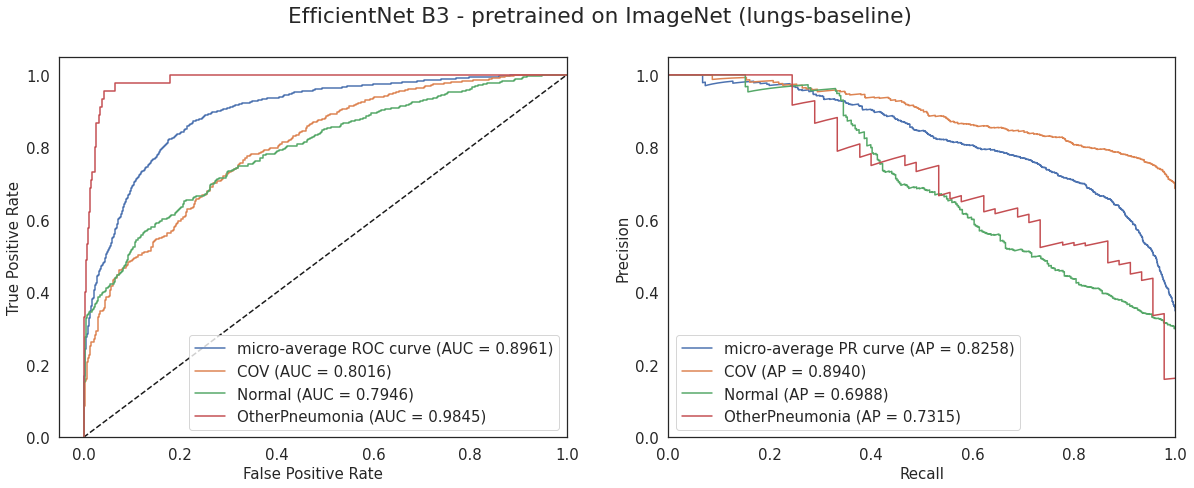

In [25]:
model = get_efficientnet_b3(**img_params)
model.load_weights('best-models/efficientnetb3-imagenet-weights/' + 'lungs' + '.ckpt')
plt.figure(figsize=(20,7))
plt.suptitle('EfficientNet B3 - pretrained on ImageNet (lungs-baseline)')
plt.subplot(121)
plot_roc_curves(model, X_val_rgb, y_val_rgb)
plt.subplot(122)
plot_pr_curves(model, X_val_rgb, y_val_rgb);

## Lungs - no crop

In [ ]:
img_params = {'img_width': 512,
              'img_height': 512}

X_val = np.load('CT-COV-Lungs/Val/X_val.npy')
y_val = np.load('CT-COV-Lungs/Val/y_val.npy')
X_val_rgb = np.load('CT-COV-Lungs/Val/X_val_rgb.npy')
y_val_rgb = np.load('CT-COV-Lungs/Val/y_val_rgb.npy')

In [ ]:
model_functions = [get_model_simple(**img_params), get_model_tiny(**img_params), get_model_small(**img_params), get_model_largew(**img_params), get_model_larget(**img_params)]
model_functions_rgb = [get_efficientnet_b3(**img_params), load_efficientnet(**img_params)]

In [ ]:
calculate_aucs('lungs-nocrop', model_functions, model_functions_rgb, get_model_bit(), X_val, y_val, X_val_rgb, y_val_rgb, None)

In [ ]:
calculate_aucs('lungs-nocrop-classw', model_functions, model_functions_rgb, get_model_bit(), X_val, y_val, X_val_rgb, y_val_rgb, None)

In [ ]:
model_functions = [get_model_simple(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.15, num_channels=1, **img_params), **img_params), 
                   get_model_tiny(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.15, num_channels=1, **img_params), **img_params), 
                   get_model_small(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.15, num_channels=1, **img_params), **img_params), 
                   get_model_largew(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.15, num_channels=1, **img_params), **img_params), 
                   get_model_larget(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.15, num_channels=1, **img_params), **img_params)]
model_functions_rgb = [get_efficientnet_b3(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.15, num_channels=3, **img_params), **img_params), 
                       load_efficientnet(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.15, num_channels=3, **img_params), **img_params)]

In [ ]:
calculate_aucs('lungs-nocrop-dataaug', model_functions, model_functions_rgb, get_model_bit(), X_val, y_val, X_val_rgb, y_val_rgb, None)

In [ ]:
calculate_aucs('lungs-nocrop-classw-dataaug', model_functions, model_functions_rgb, get_model_bit(), X_val, y_val, X_val_rgb, y_val_rgb, None)

In [ ]:
model = load_efficientnet(**img_params)
model.load_weights('best-models/efficientnetb3-weights/' + 'lungs-nocrop' + '.ckpt')
plt.figure(figsize=(20,7))
plt.suptitle('EfficientNet B3 (lungs-nocrop-baseline)')
plt.subplot(121)
plot_roc_curves(model, X_val_rgb, y_val_rgb)
plt.subplot(122)
plot_pr_curves(model, X_val_rgb, y_val_rgb);

## Crop

In [ ]:
img_params = {'img_width': 512,
              'img_height': 328}

X_val = np.load('CT-COV-Crop/Val/X_val.npy')
y_val = np.load('CT-COV-Crop/Val/y_val.npy')
X_val_rgb = np.load('CT-COV-Crop/Val/X_val_rgb.npy')
y_val_rgb = np.load('CT-COV-Crop/Val/y_val_rgb.npy')

In [ ]:
model_functions = [get_model_simple(**img_params), get_model_tiny(**img_params), get_model_small(**img_params), get_model_largew(**img_params), get_model_larget(**img_params)]
model_functions_rgb = [get_efficientnet_b3(**img_params), load_efficientnet(**img_params)]

In [ ]:
calculate_aucs('crop', model_functions, model_functions_rgb, get_model_bit(), X_val, y_val, X_val_rgb, y_val_rgb, None)

In [ ]:
calculate_aucs('crop-classw', model_functions, model_functions_rgb, get_model_bit(), X_val, y_val, X_val_rgb, y_val_rgb, None)

In [ ]:
model_functions = [get_model_simple(if_dataaug=True, data_augmentation=dataaug_layer(0.07, -0.1, 0.07, num_channels=1, **img_params), **img_params), 
                   get_model_tiny(if_dataaug=True, data_augmentation=dataaug_layer(0.07, -0.1, 0.07, num_channels=1, **img_params), **img_params), 
                   get_model_small(if_dataaug=True, data_augmentation=dataaug_layer(0.07, -0.1, 0.07, num_channels=1, **img_params), **img_params), 
                   get_model_largew(if_dataaug=True, data_augmentation=dataaug_layer(0.07, -0.1, 0.07, num_channels=1, **img_params), **img_params), 
                   get_model_larget(if_dataaug=True, data_augmentation=dataaug_layer(0.07, -0.1, 0.07, num_channels=1, **img_params), **img_params)]
model_functions_rgb = [get_efficientnet_b3(if_dataaug=True, data_augmentation=dataaug_layer(0.07, -0.1, 0.07, num_channels=3, **img_params), **img_params), 
                       load_efficientnet(if_dataaug=True, data_augmentation=dataaug_layer(0.07, -0.1, 0.07, num_channels=3, **img_params), **img_params)]

In [ ]:
calculate_aucs('crop-dataaug', model_functions, model_functions_rgb, get_model_bit(), X_val, y_val, X_val_rgb, y_val_rgb, None)

In [ ]:
calculate_aucs('crop-classw-dataaug', model_functions, model_functions_rgb, get_model_bit(), X_val, y_val, X_val_rgb, y_val_rgb, None)

## No background

In [ ]:
img_params = {'img_width': 512,
              'img_height': 512}

X_val = np.load('CT-COV-Contour/Val/X_val.npy')
y_val = np.load('CT-COV-Contour/Val/y_val.npy')
X_val_rgb = np.load('CT-COV-Contour/Val/X_val_rgb.npy')
y_val_rgb = np.load('CT-COV-Contour/Val/y_val_rgb.npy')

In [ ]:
model_functions = [get_model_simple(**img_params), get_model_tiny(**img_params), get_model_small(**img_params), get_model_largew(**img_params), get_model_larget(**img_params)]
model_functions_rgb = [get_efficientnet_b3(**img_params), load_efficientnet(**img_params)]

In [ ]:
calculate_aucs('nobackg', model_functions, model_functions_rgb, get_model_bit(), X_val, y_val, X_val_rgb, y_val_rgb, None)

In [ ]:
calculate_aucs('nobackg-classw', model_functions, model_functions_rgb, get_model_bit(), X_val, y_val, X_val_rgb, y_val_rgb, None)

In [ ]:
model_functions = [get_model_simple(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, num_channels=1, **img_params), **img_params), 
                   get_model_tiny(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, num_channels=1, **img_params), **img_params), 
                   get_model_small(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, num_channels=1, **img_params), **img_params), 
                   get_model_largew(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, num_channels=1, **img_params), **img_params), 
                   get_model_larget(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, num_channels=1, **img_params), **img_params)]
model_functions_rgb = [get_efficientnet_b3(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, num_channels=3, **img_params), **img_params), 
                       load_efficientnet(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, num_channels=3, **img_params), **img_params)]

In [ ]:
calculate_aucs('nobackg-dataaug', model_functions, model_functions_rgb, get_model_bit(), X_val, y_val, X_val_rgb, y_val_rgb, None)

In [ ]:
calculate_aucs('nobackg-classw-dataaug', model_functions, model_functions_rgb,get_model_bit(), X_val, y_val, X_val_rgb, y_val_rgb, None)

## Original images

In [ ]:
img_params = {'img_width': 512,
              'img_height': 512}

X_val = np.load('CT-COV19/Val/X_val.npy')
y_val = np.load('CT-COV19/Val/y_val.npy')
X_val_rgb = np.load('CT-COV19/Val/X_val_rgb.npy')
y_val_rgb = np.load('CT-COV19/Val/y_val_rgb.npy')

In [ ]:
model_functions = [get_model_simple(**img_params), get_model_tiny(**img_params), get_model_small(**img_params), get_model_largew(**img_params), get_model_larget(**img_params)]
model_functions_rgb = [get_efficientnet_b3(**img_params), load_efficientnet(**img_params)]

In [ ]:
calculate_aucs('first', model_functions, model_functions_rgb, get_model_bit(), X_val, y_val, X_val_rgb, y_val_rgb, None)

In [ ]:
calculate_aucs('first-classw', model_functions, model_functions_rgb, get_model_bit(), X_val, y_val, X_val_rgb, y_val_rgb, None)

In [ ]:
model_functions = [get_model_simple(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, num_channels=1, **img_params), **img_params), 
                   get_model_tiny(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, num_channels=1, **img_params), **img_params), 
                   get_model_small(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, num_channels=1, **img_params), **img_params), 
                   get_model_largew(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, num_channels=1, **img_params), **img_params), 
                   get_model_larget(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, num_channels=1, **img_params), **img_params)]
model_functions_rgb = [get_efficientnet_b3(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, num_channels=3, **img_params), **img_params), 
                       load_efficientnet(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, num_channels=3, **img_params), **img_params)]

In [ ]:
calculate_aucs('first-dataaug', model_functions, model_functions_rgb, get_model_bit(), X_val, y_val, X_val_rgb, y_val_rgb, None)

In [ ]:
calculate_aucs('first-classw-dataaug', model_functions, model_functions_rgb, get_model_bit(), X_val, y_val, X_val_rgb, y_val_rgb, None)

In [ ]:
model = get_model_simple(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, num_channels=1, **img_params), **img_params)
model.load_weights('best-models/simple-weights/' + 'first-classw-dataaug' + '.ckpt')
plt.figure(figsize=(20,7))
plt.suptitle('Simple Model (original-classw-dataaug)')
plt.subplot(121)
plot_roc_curves(model, X_val, y_val)
plt.subplot(122)
plot_pr_curves(model, X_val, y_val);

In [ ]:
model = get_model_tiny(**img_params)
model.load_weights('best-models/tiny-weights/' + 'first' + '.ckpt')
plt.figure(figsize=(20,7))
plt.suptitle('Tiny Model (original-baseline)')
plt.subplot(121)
plot_roc_curves(model, X_val, y_val)
plt.subplot(122)
plot_pr_curves(model, X_val, y_val);

In [ ]:
model = get_model_small(**img_params)
model.load_weights('best-models/small-weights/' + 'first' + '.ckpt')
plt.figure(figsize=(20,7))
plt.suptitle('Small Model (original-baseline)')
plt.subplot(121)
plot_roc_curves(model, X_val, y_val)
plt.subplot(122)
plot_pr_curves(model, X_val, y_val);

In [ ]:
model = get_model_largew(**img_params)
model.load_weights('best-models/largew-weights/' + 'first-classw' + '.ckpt')
plt.figure(figsize=(20,7))
plt.suptitle('LargeW Model (original-classw)')
plt.subplot(121)
plot_roc_curves(model, X_val, y_val)
plt.subplot(122)
plot_pr_curves(model, X_val, y_val);

In [ ]:
model = get_model_larget(**img_params)
model.load_weights('best-models/larget-weights/' + 'first' + '.ckpt')
plt.figure(figsize=(20,7))
plt.suptitle('LargeT Model (original-baseline)')
plt.subplot(121)
plot_roc_curves(model, X_val, y_val)
plt.subplot(122)
plot_pr_curves(model, X_val, y_val);

In [ ]:
model = get_model_larget(**img_params)
model.load_weights('best-models/larget-weights/' + 'first' + '.ckpt')
plt.figure(figsize=(20,7))
plt.suptitle('LargeT Model (original-baseline)')
plt.subplot(121)
plot_roc_curves(model, X_val, y_val)
plt.subplot(122)
plot_pr_curves(model, X_val, y_val);

In [ ]:
model = get_model_bit()
model.load_weights('best-models/googlebit-weights/' + 'first' + '.ckpt')
plt.figure(figsize=(20,7))
plt.suptitle('ResNet-50 (original-baseline)')
plt.subplot(121)
plot_roc_curves(model, X_val_rgb/np.max(X_val_rgb), y_val_rgb)
plt.subplot(122)
plot_pr_curves(model, X_val_rgb/np.max(X_val_rgb), y_val_rgb);